In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
#from tensorflow import keras
import keras
import matplotlib.pyplot as plt
from vis.visualization import visualize_saliency
from vis.visualization import get_num_filters
from vis.visualization import visualize_activation
from vis.utils import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations

# 1. Loading Data 

## Read dataset

In [17]:
data = tf.keras.datasets.mnist

In [18]:
(trainX, trainY),(testX, testY) = data.load_data()

In [19]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [20]:
trainY = keras.utils.to_categorical(trainY, 10)
testY = keras.utils.to_categorical(testY, 10)

In [21]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [22]:
print(trainX.shape)

(60000, 28, 28, 1)


# Training

## Code for training

In [23]:
#Creates Sequential model using Keras
#Number of nodes is the same as number of features (different number of nodes were tried but it did not
#affect validation accuracy significantly)
lenet = keras.Sequential([
                            #Input layer:
                            keras.layers.Conv2D(20, 5, padding="same", input_shape=[28,28,1], use_bias=True),
                            #Hidden Layers:
                            keras.layers.Activation(activation="relu"),
                            keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                            keras.layers.Conv2D(50, 5, padding="same"),
                            keras.layers.Activation(activation="relu"),
                            keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                            keras.layers.Flatten(),
                            keras.layers.Dense(500),
                            keras.layers.Activation(activation="relu"),
                            keras.layers.Dense(10, name='vis',use_bias=True),
                            #Output layer
                            keras.layers.Activation(activation="softmax"),
                        ])

In [24]:
lenets = [keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet)]

In [25]:
#Compiles sequential model
#Using learning rate 0.01
#Loss function will be categorical crossentropy
lenet.compile(
                optimizer=keras.optimizers.SGD(lr=0.01),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
                )
#Trains network over a number of epochs and evaluates network agains validation data
#after each epoch
lenetEpochHistory = lenet.fit(trainX, trainY, epochs = 5, validation_data = (testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 233us/step - loss: 0.4289 - acc: 0.8794 - val_loss: 0.1187 - val_acc: 0.9643
Epoch 2/5
60000/60000 [==============================] - 13s 212us/step - loss: 0.1048 - acc: 0.9684 - val_loss: 0.0735 - val_acc: 0.9758
Epoch 3/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.0737 - acc: 0.9779 - val_loss: 0.0619 - val_acc: 0.9807
Epoch 4/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.0590 - acc: 0.9818 - val_loss: 0.0456 - val_acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.0489 - acc: 0.9852 - val_loss: 0.0414 - val_acc: 0.9867


In [26]:
#Compiles sequential model
#Using learning rate 0.01
#Loss function will be categorical crossentropy
for model in lenets:
    model.compile(
                    optimizer=keras.optimizers.SGD(lr=0.01),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy']
                    )
#Trains network over a number of epochs and evaluates network agains validation data
#after each epoch
for model in lenets:
    model.fit(trainX, trainY, epochs = 5, validation_data = (testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 233us/step - loss: 0.4203 - acc: 0.8799 - val_loss: 0.1360 - val_acc: 0.9607
Epoch 2/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.1097 - acc: 0.9674 - val_loss: 0.0865 - val_acc: 0.9724
Epoch 3/5
60000/60000 [==============================] - 13s 212us/step - loss: 0.0747 - acc: 0.9774 - val_loss: 0.0616 - val_acc: 0.9814
Epoch 4/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.0591 - acc: 0.9819 - val_loss: 0.0512 - val_acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.0496 - acc: 0.9849 - val_loss: 0.0470 - val_acc: 0.9842
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 231us/step - loss: 0.4047 - acc: 0.8807 - val_loss: 0.1247 - val_acc: 0.9622
Epoch 2/5
60000/60000 [==============================] - 13s 214us/step 

# Evaluation

In [27]:
#Predicting Label:

print(np.argmax(lenet.predict(testX)[100]))
print(np.argmax(testY[100]))

6
6


10000/10000 [==============================] - 1s 89us/step
Lenet accuracy:  0.9867
Lenet loss:  0.041421129594766536


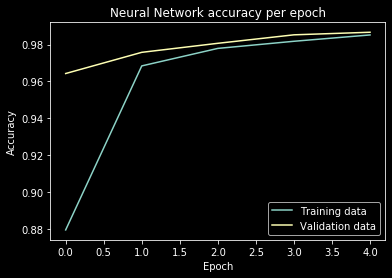

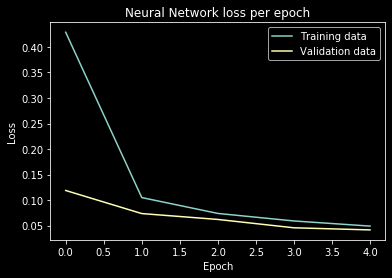

In [28]:
#Get accuracy for lenet
sequentialLoss, sequentialAccuracy = lenet.evaluate(testX, testY)
print('Lenet accuracy: ', sequentialAccuracy)
print('Lenet loss: ', sequentialLoss)

plt.style.use('dark_background')
plt.plot(lenetEpochHistory.history['acc'])
plt.plot(lenetEpochHistory.history['val_acc'])
plt.title('Neural Network accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'])
plt.show()

plt.style.use('dark_background')
plt.plot(lenetEpochHistory.history['loss'])
plt.plot(lenetEpochHistory.history['val_loss'])
plt.title('Neural Network loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'])
plt.show()

In [29]:
utils.find_layer_idx(lenet, 'vis')
#lenet.layers[9].get_weights()
#lenet.layers[9].get_weights()[0][0]
#len(lenet.layers[9].get_weights()[1])
#lenet.layers[9].get_weights()[1]

9

In [30]:
get_num_filters(lenet.layers[9])

10

In [31]:
names = [weight.name for layer in lenet.layers for weight in layer.weights]
weights = lenet.get_weights()

for name, weight in zip(names, weights):
    print(name, weight.shape)

conv2d_3/kernel:0 (5, 5, 1, 20)
conv2d_3/bias:0 (20,)
conv2d_4/kernel:0 (5, 5, 20, 50)
conv2d_4/bias:0 (50,)
dense_2/kernel:0 (2450, 500)
dense_2/bias:0 (500,)
vis_7/kernel:0 (500, 10)
vis_7/bias:0 (10,)


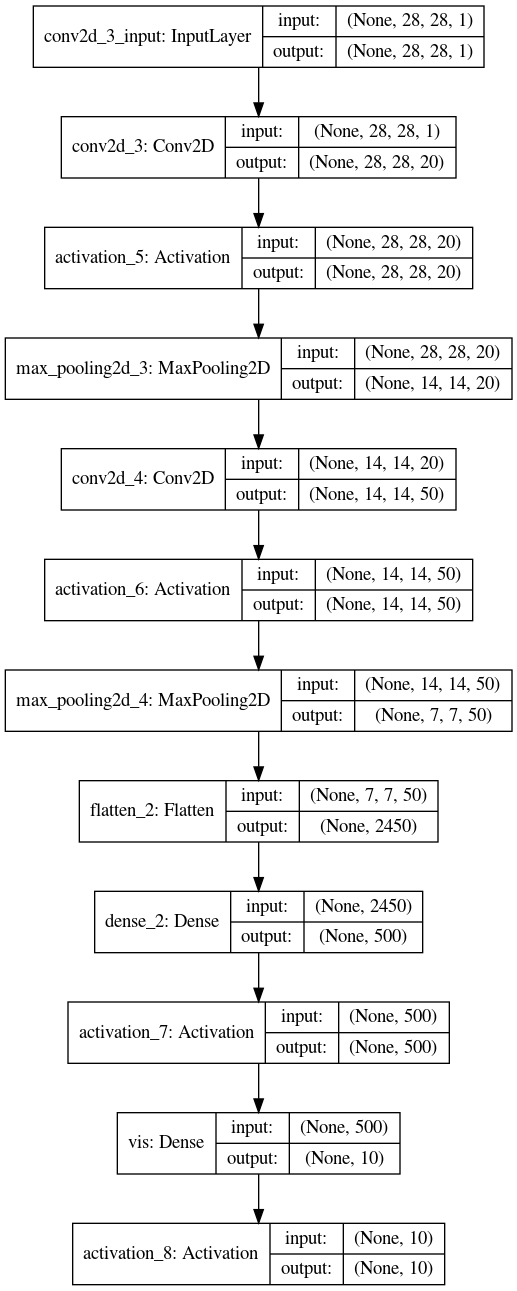

In [32]:
plot_model(lenet, to_file='model.png',show_shapes=True)

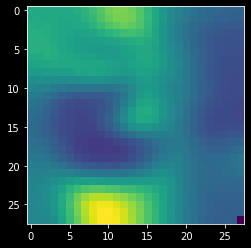

In [45]:
activation_map = visualize_activation(lenet,9,filter_indices=3)
activation_map = activation_map.reshape(28,28)
plt.imshow(activation_map,interpolation='nearest')

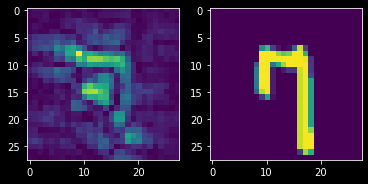

In [34]:
input_idx = 80
fig, ax = plt.subplots(nrows=1, ncols=2)
saliency_map = visualize_saliency(model = lenet,layer_idx = 9, filter_indices = np.argmax(testY[input_idx]), seed_input = testX[input_idx])
ax[0].imshow(saliency_map.reshape(28,28),interpolation='nearest')
ax[1].imshow(testX[input_idx].reshape(28,28))
plt.show()